In [4]:
import pyodbc
import pandas as pd

In [5]:
# Connection string for windows authentication
connection=pyodbc.connect(
    "Driver={SQL Server};"
    "Server=LAPTOP-V3LL5JD7\\SQLEXPRESS;"
    "Database=ChurnDB;"
    "Trusted_Connection=yes;"
)

In [6]:
# pull data from clean view ssms
df=pd.read_sql("select * from vw_CustomerChurn_Clean", connection)

C:\Users\amiri\AppData\Local\Temp\ipykernel_58236\2156260662.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql("select * from vw_CustomerChurn_Clean", connection)


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,TenureBucket,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag
0,7590-VHVEG,Female,False,Yes,No,1,0-12,No,No,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No,0
1,5575-GNVDE,Male,False,No,No,34,25-48,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No,0
2,3668-QPYBK,Male,False,No,No,2,0-12,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes,1
3,7795-CFOCW,Male,False,No,No,45,25-48,No,No,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No,0
4,9237-HQITU,Female,False,No,No,2,0-12,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes,1


In [8]:
df.shape

(7043, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   bool   
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   TenureBucket      7043 non-null   object 
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
TenureBucket         0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
ChurnFlag            0
dtype: int64

### Insights:
#### Dataset has 7043 rows and 23 columns.
#### Only TotalCharges has 11 Null values.

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

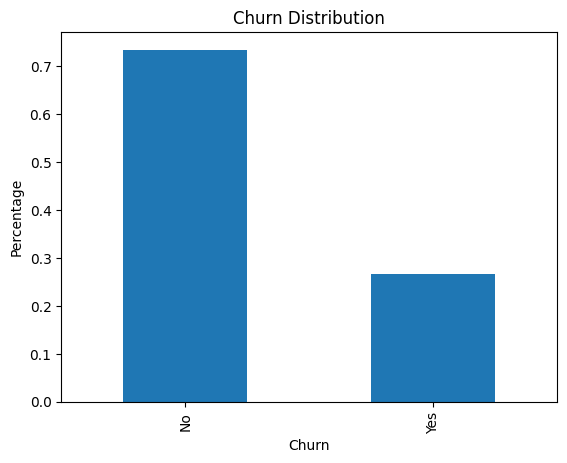

Overall Churn Rate: 26.54 %


In [12]:
# Churn Distribution
df['Churn'].value_counts(normalize=True).plot(kind='bar', title="Churn Distribution")
plt.ylabel("Percentage")
plt.show()

churn_rate = df['ChurnFlag'].mean()
print("Overall Churn Rate:", round(churn_rate*100,2), "%")

### Insights:
#### Churn rate= ~26.5%, which means 1 in 4 Customers leave.

Text(0, 0.5, 'Churn Rate')

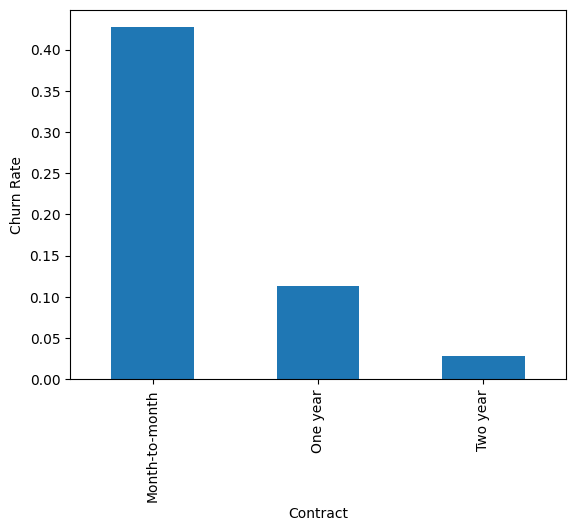

In [13]:
# Churn by contract type
df.groupby('Contract')['ChurnFlag'].mean().plot(kind='bar')
plt.ylabel('Churn Rate')

### Insights:
#### Month to month contracts has highest churn (more than 40%)
#### 2 Years contract has lowers churn (<5%)
#### suggests customers in longer contracts reduces churn.

Text(0, 0.5, 'Churn Rate')

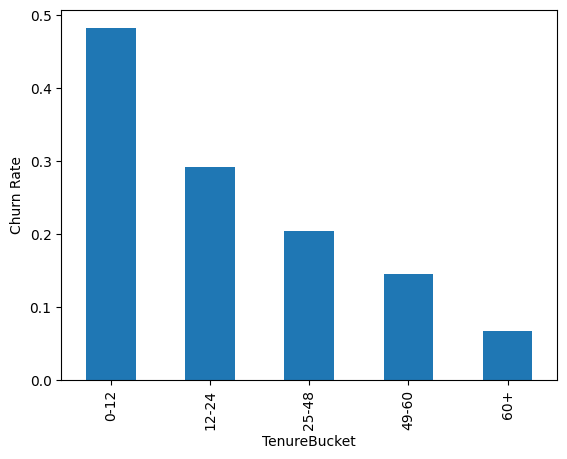

In [14]:
# Churn by Tenure

df.groupby('TenureBucket')['ChurnFlag'].mean().plot(kind='bar')
plt.ylabel('Churn Rate')

### Insights:
#### New customers churn the most (nearly 45%).
#### Long term customers (60+ months) rarely churn (<10%).

C:\Users\amiri\AppData\Local\Temp\ipykernel_58236\1889015658.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['MonthlyCharges'], bins=[0,35,70,105,200]))['ChurnFlag'].mean().plot(kind='bar', title="Churn Rate by Monthly Charges Range")


Text(0, 0.5, 'Churn Rate')

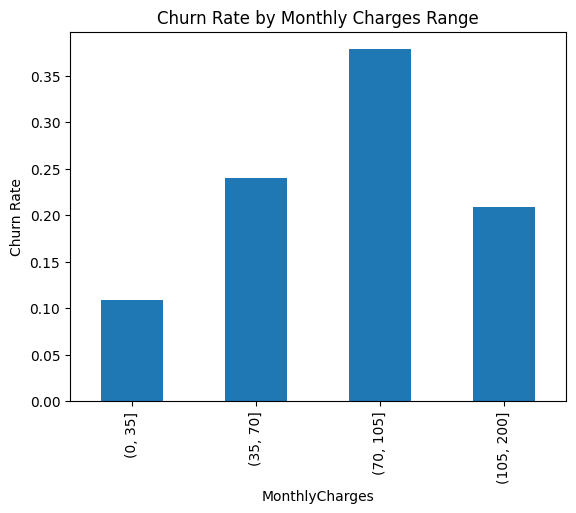

In [15]:
# Churn vs Monthly Charges
df.groupby(pd.cut(df['MonthlyCharges'], bins=[0,35,70,105,200]))['ChurnFlag'].mean().plot(kind='bar', title="Churn Rate by Monthly Charges Range")
plt.ylabel("Churn Rate")

### Insights:
#### Higher monthly charges (>70) has higher churn.

In [18]:
# Churn by service
service_cols=['PhoneService','InternetService','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies']
for col in service_cols:
    churn_rates=df.groupby(col)['ChurnFlag'].mean()
    print(f"\n{col}:\n{churn_rates}")


PhoneService:
PhoneService
No     0.249267
Yes    0.267096
Name: ChurnFlag, dtype: float64

InternetService:
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: ChurnFlag, dtype: float64

OnlineSecurity:
OnlineSecurity
No     0.313296
Yes    0.146112
Name: ChurnFlag, dtype: float64

TechSupport:
TechSupport
No     0.311862
Yes    0.151663
Name: ChurnFlag, dtype: float64

StreamingTV:
StreamingTV
No     0.243312
Yes    0.300702
Name: ChurnFlag, dtype: float64

StreamingMovies:
StreamingMovies
No     0.243795
Yes    0.299414
Name: ChurnFlag, dtype: float64


### Insights:
#### Customers with Fiber Optic internet churn more.
#### Lack of OnlineSecurity / TechSupport strongly linked to churn.

Text(0.5, 1.0, 'Correlation Heatmap')

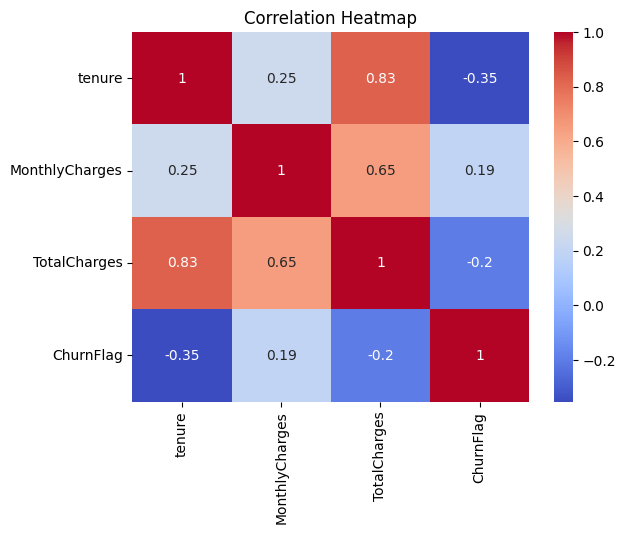

In [19]:
# Correlation Heatmap
numeric_cols = ['tenure','MonthlyCharges','TotalCharges','ChurnFlag']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

### Insights:
#### Tenure negatively correlated with churn (Longer stay = Less churn).
#### MonthlyCharges positively correlated with churn (High bills = More churn).

## Data Preprocessing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
# Drop irrelevant columns and nulls
df_ml = df.dropna(subset=['TotalCharges']).drop(columns=['customerID','Churn'])
X = df_ml.drop('ChurnFlag', axis=1)
y = df_ml['ChurnFlag']

In [25]:
# identify categorical and numerical cols
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical:", cat_cols)
print("Numeric:",num_cols)

Categorical: ['gender', 'Partner', 'Dependents', 'TenureBucket', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [27]:
# Preprocessor(OneHot for categorical, passthrough for numeric)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('num', 'passthrough', num_cols)
])

In [31]:
# Build pipeline
log_reg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=2000, solver='saga'))
])

In [32]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [33]:
# train
log_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'TenureBucket',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(max_iter=2000, solver='saga'))])

In [35]:
# Prediction
y_pred=log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

In [36]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test,y_prob))
print(classification_report(y_test,y_pred))

Logistic Regression Performance:
Accuracy: 0.7706161137440758
ROC-AUC: 0.7989151761414701
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1549
           1       0.58      0.51      0.54       561

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



In [37]:
confusion_matrix(y_test,y_pred)

array([[1338,  211],
       [ 273,  288]], dtype=int64)

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model=Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

In [40]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'TenureBucket',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [41]:
# Prediction
y_pred_rf=rf_model.predict(X_test)
y_prob_rf=rf_model.predict_proba(X_test)[:,1]

In [42]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test,y_prob_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Performance:
Accuracy: 0.7862559241706161
ROC-AUC: 0.8159297758659775
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



### Results
#### Accuracy: 0.786 (~79%)
#### ROC-AUC: 0.816 (~81.6%)

In [43]:
confusion_matrix(y_test,y_pred_rf)

array([[1387,  162],
       [ 289,  272]], dtype=int64)

## Feature importance visualization

In [44]:
# Feature importance from RF
rf_features = rf_model.named_steps['preprocess'].transformers_[0][1].get_feature_names_out(cat_cols)
all_features = list(rf_features) + num_cols
importances = rf_model.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

Text(0.5, 0, 'Importance Score')

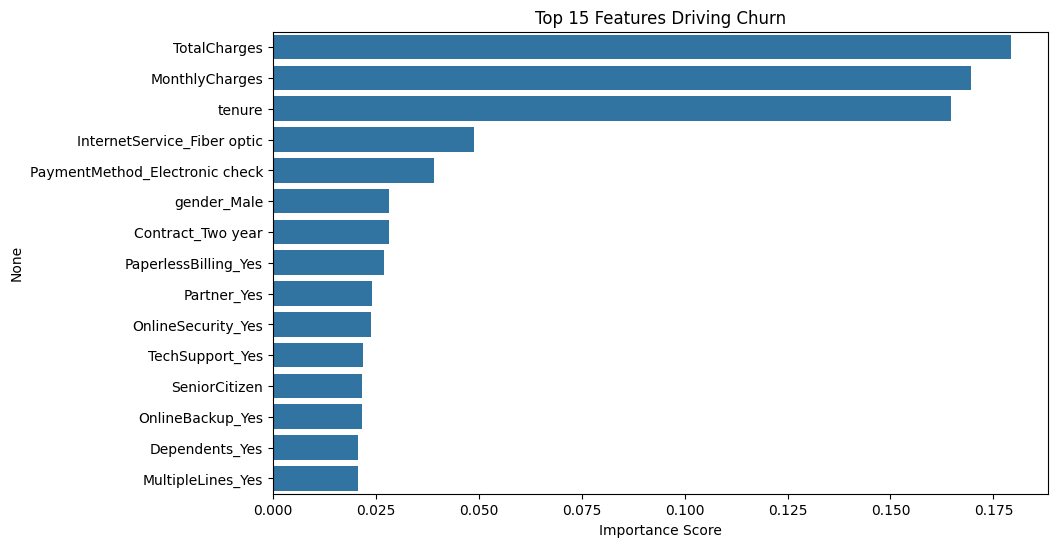

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Features Driving Churn")
plt.xlabel("Importance Score")